This week' exercice are about multivariate linear regression and gradient descent.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Univariate exemple

Let's load the dataset 1 into numpy

In [2]:
data = []
with open('./data/ex1data1.txt') as f:
    for line in f:
        data.append(line.strip().split(','))
data = np.array(data).astype(np.float64)
print(data.shape)

(97, 2)


In [3]:
X = data[:,0].reshape((len(data),1))
y = data[:,1]

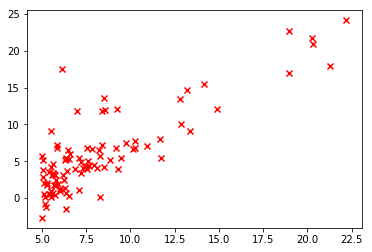

In [4]:
fig, ax = plt.subplots()
ax.scatter(X,y,marker='x', color='red')
plt.show()

In [5]:
# benchmark in scikit
reg = LinearRegression()
reg.fit(X,y)
reg.score(X,y)
print(reg.intercept_)
print(reg.coef_)

-3.895780878311852
[1.19303364]


In [6]:
# adding intercept to X (to do only once!)
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones, X),axis=1)

In [7]:
# initial parameters
theta0 = np.zeros((X.shape[1],1))

In [8]:
def compute_cost(X, y, theta):
    to_sum = (( X @ theta) - y) ** 2
    return to_sum.sum() / (2 * len(X))

In [9]:
compute_cost(X, y, theta0)

3111.0551861132

In [10]:
def gradient_descent(X, y, theta, iters, alpha):
    y = y.reshape((len(y),1))
    cost = []
    for i in range(iters):
        h = X @ theta
        theta = theta - ((alpha / len(X)) * (X.T @ (h - y)))
        
        # cost tracking (not usefull exept for debug)
        cost.append(compute_cost(X, y, theta))
    
    return theta, cost

Attention that you need to find proper values of alpha in order to enable convergence and find 'global' optimal.

In [11]:
theta_optimal, cost = gradient_descent(X, y, theta0, iters=1000, alpha=0.01)

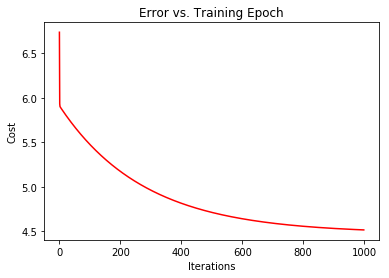

In [12]:
# plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(1000), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  
plt.show()

Let's plot our regression line

In [13]:
y_pred = X @ theta_optimal

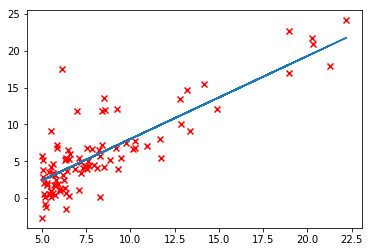

In [14]:
fig, ax = plt.subplots()
ax.scatter(X[:,1], y, marker='x', color='red')
ax.plot(X[:,1], y_pred)
plt.show()

### Multivariate exemple

Let's load the dataset 2 into numpy

In [15]:
data = []
with open('./data/ex1data2.txt') as f:
    for line in f:
        data.append(line.strip().split(','))
data = np.array(data).astype(np.float64)
print(data.shape)

(47, 3)


In [16]:
X = data[:,:2]
y = data[:,2]

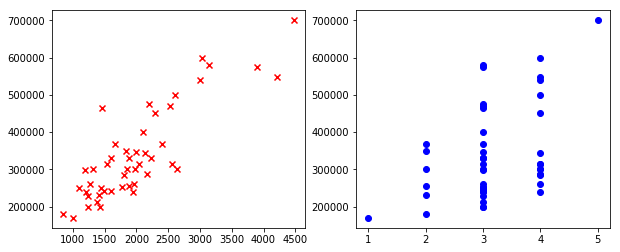

In [17]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))
ax[0].scatter(X[:,0], y, marker='x', color='red')
ax[1].scatter(X[:,1], y, marker='o', color='blue')
plt.show()

When features differ by orders of magnitude, first performing **feature scaling** can make gradient descent converge much more quickly. Note that, when normalizing the features, it is important to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters from the model, we often want to predict the prices of houses we have not seen before. Given a new x value (living room area and number of bedrooms), we must first normalize x using the mean and standard deviation that we had previously computed from the training set.


In [18]:
def feature_normalise(X): 
    return (X - X.mean(axis=0)) / X.std(axis=0)

In [19]:
X_norm = feature_normalise(X)

In [20]:
# small check, normalise date should have mean 0 and std of 1.
print(X_norm[:,0].mean(), X_norm[:,0].std())
print(X_norm[:,1].mean(), X_norm[:,1].std())

9.448706592554524e-18 1.0
2.43304194758279e-16 0.9999999999999997


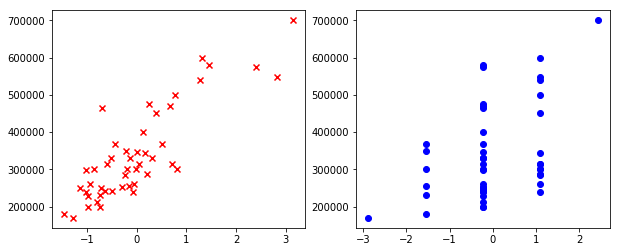

In [21]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))
ax[0].scatter(X_norm[:,0], y, marker='x', color='red')
ax[1].scatter(X_norm[:,1], y, marker='o', color='blue')
plt.show()

In [22]:
# benchmark in scikit
reg = LinearRegression()
reg.fit(X_norm, y)
reg.score(X_norm, y)
print(reg.intercept_)
print(reg.coef_)

340412.6595744681
[109447.79646964  -6578.35485416]


In [23]:
# adding intercept to X (to do only once!)
ones = np.ones([X_norm.shape[0],1])
X_norm = np.concatenate((ones, X_norm),axis=1)

In [24]:
# initial parameters
theta0 = np.zeros((X_norm.shape[1],1))

In [25]:
theta_optimal, cost = gradient_descent(X_norm, y, theta0, iters=100, alpha=0.1)

In [26]:
theta_optimal

array([[340403.61773803],
       [108803.37852266],
       [ -5933.9413402 ]])

Text(0.5, 1.0, 'Error vs. Training Epoch')

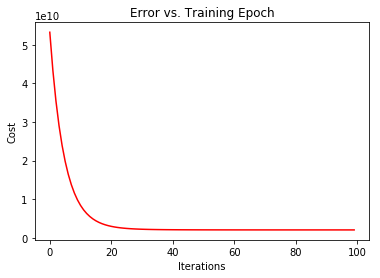

In [27]:
# plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(100), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')  

Let's plot our regression line.

In [28]:
to_pred = np.array([np.ones(len(y)), 
         np.linspace(-1.0, 3.0, num=len(y)),
         np.linspace(-3.0, 3.0, num=len(y))]).T

In [29]:
y_pred = to_pred @ theta_optimal

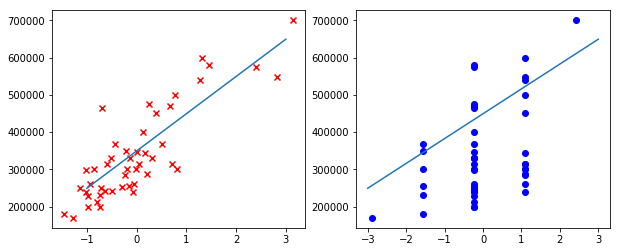

In [30]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))
ax[0].scatter(X_norm[:,1], y, marker='x', color='red')
ax[0].plot(to_pred[:,1], y_pred)
ax[1].scatter(X_norm[:,2], y, marker='o', color='blue')
ax[1].plot(to_pred[:,2], y_pred)
plt.show()

 ### Normal Equations

In [31]:
theta_best = np.linalg.inv(X_norm.T.dot(X_norm)).dot(X_norm.T).dot(y)

In [32]:
theta_best

array([340412.65957447, 109447.79646964,  -6578.35485416])